In [1]:
# 코랩에서 메모리 부족을 피하기 위해 부동소수점 정밀도를 낮춥니다.
import tensorflow as tf

tf.keras.backend.set_floatx('float16')

In [3]:
from tensorflow.keras.datasets import mnist
import numpy as np

(train_images,train_labels),_ = mnist.load_data()
train_images = train_images.reshape((60000,28*28))
train_images = train_images.astype("float32") / 255

train_images_with_noise_channels = np.concatenate(
    [train_images,np.random.random((len(train_images),784))],axis=1)

train_images_with_zeros_channels = np.concatenate(
    [train_images,np.zeros((len(train_images),784))],axis=1)

11490434/11490434 [==============================] - 0s 0us/step


In [5]:
train_images_with_noise_channels.shape

(60000, 1568)

In [6]:
from tensorflow import keras
from tensorflow.keras import layers

def get_model():
    model = keras.Sequential([
        layers.Dense(512,activation="relu"),
        layers.Dense(10,activation="softmax")
    ])
    model.compile(optimizer="rmsprop",
                  loss = "sparse_categorical_crossentropy",
                  metrics=["accuracy"])
    return model
model = get_model()
history_noise = model.fit(
    train_images_with_noise_channels,train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)
model = get_model()
history_zeros = model.fit(
    train_images_with_zeros_channels,train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)


Epoch 1/10
375/375 [==============================] - 3s 4ms/step - loss: 0.6279 - accuracy: 0.8135 - val_loss: 0.4387 - val_accuracy: 0.8574
Epoch 2/10
375/375 [==============================] - 1s 3ms/step - loss: 0.2659 - accuracy: 0.9302 - val_loss: 0.2112 - val_accuracy: 0.9326
Epoch 3/10
375/375 [==============================] - 1s 3ms/step - loss: 0.1750 - accuracy: 0.9639 - val_loss: 0.1807 - val_accuracy: 0.9468
Epoch 4/10
375/375 [==============================] - 1s 4ms/step - loss: 0.1251 - accuracy: 0.9800 - val_loss: 0.1685 - val_accuracy: 0.9541
Epoch 5/10
375/375 [==============================] - 2s 4ms/step - loss: 0.0917 - accuracy: 0.9907 - val_loss: 0.1307 - val_accuracy: 0.9629
Epoch 6/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0682 - accuracy: 0.9946 - val_loss: 0.1267 - val_accuracy: 0.9639
Epoch 7/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0509 - accuracy: 0.9976 - val_loss: 0.1328 - val_accuracy: 0.9639
Epoch 

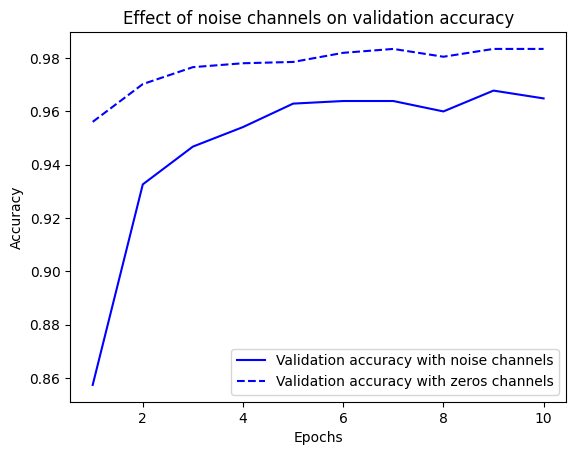

In [7]:
import matplotlib.pyplot as plt
val_acc_noise = history_noise.history["val_accuracy"]
val_acc_zeros = history_zeros.history["val_accuracy"]
epochs = range(1, 11)
plt.plot(epochs, val_acc_noise, "b-",
         label="Validation accuracy with noise channels")
plt.plot(epochs, val_acc_zeros, "b--",
         label="Validation accuracy with zeros channels")
plt.title("Effect of noise channels on validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [9]:
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

random_train_labels = train_labels[:]
np.random.shuffle(random_train_labels)

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, random_train_labels,
          epochs=100,
          batch_size=128,
          validation_split=0.2)

Epoch 1/100
375/375 [==============================] - 2s 4ms/step - loss: inf - accuracy: 0.1058 - val_loss: 2.2930 - val_accuracy: 0.1071
Epoch 2/100
375/375 [==============================] - 1s 3ms/step - loss: inf - accuracy: 0.1130 - val_loss: 2.2988 - val_accuracy: 0.1104
Epoch 3/100
375/375 [==============================] - 1s 3ms/step - loss: inf - accuracy: 0.1245 - val_loss: 2.3125 - val_accuracy: 0.1033
Epoch 4/100
375/375 [==============================] - 2s 4ms/step - loss: inf - accuracy: 0.1338 - val_loss: 2.3223 - val_accuracy: 0.1041
Epoch 5/100
375/375 [==============================] - 1s 3ms/step - loss: inf - accuracy: 0.1471 - val_loss: 2.3359 - val_accuracy: 0.1028
Epoch 6/100
375/375 [==============================] - 1s 3ms/step - loss: inf - accuracy: 0.1598 - val_loss: 2.3398 - val_accuracy: 0.1041
Epoch 7/100
375/375 [==============================] - 1s 3ms/step - loss: inf - accuracy: 0.1730 - val_loss: 2.3613 - val_accuracy: 0.1030
Epoch 8/100
375/375 

In [10]:
model = keras.Sequential([
    layers.Dense(512,activation="relu"),
    layers.Dense(10,activation="softmax")
])
model.compile(optimizer=keras.optimizers.RMSprop(1e-2),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images,train_labels,
          epochs=10,
          batch_size=128,
          validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 2s 4ms/step - loss: inf - accuracy: 0.1077 - val_loss: 2.2852 - val_accuracy: 0.1140
Epoch 2/10
375/375 [==============================] - 1s 3ms/step - loss: inf - accuracy: 0.1115 - val_loss: 2.2871 - val_accuracy: 0.1133
Epoch 3/10
375/375 [==============================] - 1s 3ms/step - loss: inf - accuracy: 0.1097 - val_loss: 2.2852 - val_accuracy: 0.1140
Epoch 4/10
375/375 [==============================] - 1s 3ms/step - loss: inf - accuracy: 0.1105 - val_loss: 2.2852 - val_accuracy: 0.1144
Epoch 5/10
375/375 [==============================] - 1s 4ms/step - loss: inf - accuracy: 0.1120 - val_loss: 2.2930 - val_accuracy: 0.1006
Epoch 6/10
375/375 [==============================] - 2s 4ms/step - loss: inf - accuracy: 0.1141 - val_loss: 2.2891 - val_accuracy: 0.1136
Epoch 7/10
375/375 [==============================] - 1s 3ms/step - loss: inf - accuracy: 0.1143 - val_loss: 2.2988 - val_accuracy: 0.1111
Epoch 8/10
375/375 [=======

In [11]:
model = keras.Sequential([layers.Dense(10,activation="softmax")])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history_small_model = model.fit(
    train_images, train_labels,
    epochs=20,
    batch_size=128,
    validation_split=0.2)

Epoch 1/20
375/375 [==============================] - 2s 4ms/step - loss: inf - accuracy: 0.1005 - val_loss: 2.3262 - val_accuracy: 0.1041
Epoch 2/20
375/375 [==============================] - 1s 3ms/step - loss: inf - accuracy: 0.1093 - val_loss: 2.3262 - val_accuracy: 0.1024
Epoch 3/20
375/375 [==============================] - 1s 3ms/step - loss: inf - accuracy: 0.1136 - val_loss: 2.3223 - val_accuracy: 0.1011
Epoch 4/20
375/375 [==============================] - 1s 3ms/step - loss: inf - accuracy: 0.1161 - val_loss: 2.3262 - val_accuracy: 0.1042
Epoch 5/20
375/375 [==============================] - 1s 3ms/step - loss: inf - accuracy: 0.1179 - val_loss: 2.3340 - val_accuracy: 0.1104
Epoch 6/20
375/375 [==============================] - 1s 3ms/step - loss: inf - accuracy: 0.1243 - val_loss: 2.3262 - val_accuracy: 0.1021
Epoch 7/20
375/375 [==============================] - 1s 4ms/step - loss: inf - accuracy: 0.1243 - val_loss: 2.3203 - val_accuracy: 0.1013
Epoch 8/20
375/375 [=======

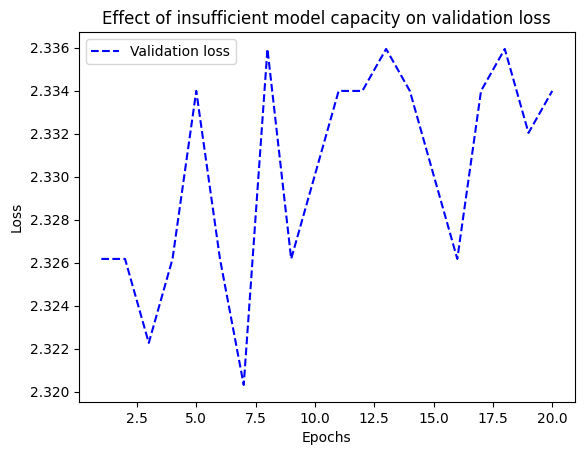

In [12]:
import matplotlib.pyplot as plt
val_loss = history_small_model.history["val_loss"]
epochs = range(1, 21)
plt.plot(epochs, val_loss, "b--",
         label="Validation loss")
plt.title("Effect of insufficient model capacity on validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [13]:
model = keras.Sequential([
    layers.Dense(96, activation="relu"),
    layers.Dense(96, activation="relu"),
    layers.Dense(10, activation="softmax"),
])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history_large_model = model.fit(
    train_images, train_labels,
    epochs=20,
    batch_size=128,
    validation_split=0.2)

Epoch 1/20
375/375 [==============================] - 2s 4ms/step - loss: inf - accuracy: 0.1057 - val_loss: 2.2871 - val_accuracy: 0.1115
Epoch 2/20
375/375 [==============================] - 2s 4ms/step - loss: inf - accuracy: 0.1095 - val_loss: 2.2871 - val_accuracy: 0.1022
Epoch 3/20
375/375 [==============================] - 1s 3ms/step - loss: inf - accuracy: 0.1142 - val_loss: 2.2910 - val_accuracy: 0.1092
Epoch 4/20
375/375 [==============================] - 1s 3ms/step - loss: inf - accuracy: 0.1179 - val_loss: 2.3047 - val_accuracy: 0.1061
Epoch 5/20
375/375 [==============================] - 1s 3ms/step - loss: inf - accuracy: 0.1240 - val_loss: 2.3008 - val_accuracy: 0.1077
Epoch 6/20
375/375 [==============================] - 1s 3ms/step - loss: inf - accuracy: 0.1292 - val_loss: 2.3086 - val_accuracy: 0.1058
Epoch 7/20
375/375 [==============================] - 1s 3ms/step - loss: inf - accuracy: 0.1372 - val_loss: 2.3125 - val_accuracy: 0.1077
Epoch 8/20
375/375 [=======

In [14]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(64,activation="relu"),
    layers.Dense(10,activation="softmax")
])

In [15]:
model = keras.Sequential()
model.add(layers.Dense(64,activation="relu"))
model.add(layers.Dense(10,activation="softmax"))

In [16]:
model.build(input_shape=(None,3))
model.weights

[<tf.Variable 'dense_16/kernel:0' shape=(3, 64) dtype=float16, numpy=
 array([[-0.1859  , -0.01636 , -0.235   ,  0.00757 ,  0.02466 ,  0.2876  ,
         -0.2573  , -0.05554 , -0.267   , -0.2583  , -0.2573  ,  0.06836 ,
         -0.2683  , -0.09705 , -0.00415 ,  0.1216  ,  0.2524  ,  0.09595 ,
         -0.1509  ,  0.1995  , -0.1484  ,  0.04102 , -0.2081  , -0.07544 ,
          0.2734  ,  0.207   , -0.249   ,  0.2227  , -0.06665 ,  0.1287  ,
         -0.2678  , -0.04736 , -0.06604 , -0.2783  , -0.2795  , -0.1953  ,
          0.1953  ,  0.1328  ,  0.1123  ,  0.1987  ,  0.1614  , -0.02686 ,
          0.0796  , -0.0725  ,  0.06323 ,  0.08765 ,  0.00586 , -0.02979 ,
         -0.2197  , -0.2683  , -0.1373  , -0.2864  ,  0.1145  ,  0.2202  ,
          0.1636  , -0.0731  , -0.1216  ,  0.1677  ,  0.00415 , -0.02051 ,
          0.2944  , -0.09937 , -0.06604 ,  0.0432  ],
        [-0.02856 ,  0.1233  ,  0.11816 ,  0.1958  ,  0.05835 ,  0.1245  ,
          0.2354  , -0.11694 ,  0.2305  ,  0.03052 

In [17]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 64)                256       
                                                                 
 dense_17 (Dense)            (None, 10)                650       
                                                                 
Total params: 906 (1.77 KB)
Trainable params: 906 (1.77 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [18]:
model = keras.Sequential(name="my_example_model")
model.add(layers.Dense(64,activation="relu",name="my_first_layer"))
model.add(layers.Dense(10,activation="softmax",name="my_last_layer"))
model.build((None,3))
model.summary()

Model: "my_example_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 my_first_layer (Dense)      (None, 64)                256       
                                                                 
 my_last_layer (Dense)       (None, 10)                650       
                                                                 
Total params: 906 (1.77 KB)
Trainable params: 906 (1.77 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [19]:
model = keras.Sequential()
model.add(keras.Input(shape=(3,)))
model.add(layers.Dense(64,activation="relu"))
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 64)                256       
                                                                 
Total params: 256 (512.00 Byte)
Trainable params: 256 (512.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [20]:
model.add(layers.Dense(10,activation="softmax"))
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 64)                256       
                                                                 
 dense_19 (Dense)            (None, 10)                650       
                                                                 
Total params: 906 (1.77 KB)
Trainable params: 906 (1.77 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [21]:
inputs = keras.Input(shape=(3,),name="my_input")
features = layers.Dense(64,activation="relu")(inputs)
outputs = layers.Dense(10,activation="softmax")(features)
model = keras.Model(inputs=inputs,outputs=outputs)

In [22]:
inputs = keras.Input(shape=(3,),name="my_input")
inputs.shape

TensorShape([None, 3])

In [23]:
features = layers.Dense(64,activation="relu")(inputs)
features.shape

TensorShape([None, 64])

In [24]:
inputs.dtype

tf.float16

In [25]:
features = layers.Dense(64,activation="relu")(inputs)

In [26]:
features.shape

TensorShape([None, 64])

In [27]:
outputs = layers.Dense(10,activation="softmax")(features)
model = keras.Model(inputs=inputs,outputs=outputs)

In [28]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 my_input (InputLayer)       [(None, 3)]               0         
                                                                 
 dense_23 (Dense)            (None, 64)                256       
                                                                 
 dense_24 (Dense)            (None, 10)                650       
                                                                 
Total params: 906 (1.77 KB)
Trainable params: 906 (1.77 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [29]:
vocabulary_size = 10000
num_tags = 100
num_departments = 4

title = keras.Input(shape=(vocabulary_size,), name="title")
text_body = keras.Input(shape=(vocabulary_size,), name="text_body")
tags = keras.Input(shape=(num_tags,), name="tags")

features = layers.Concatenate()([title, text_body, tags])
features = layers.Dense(64, activation="relu")(features)

priority = layers.Dense(1, activation="sigmoid", name="priority")(features)
department = layers.Dense(
    num_departments, activation="softmax", name="department")(features)

model = keras.Model(inputs=[title, text_body, tags], outputs=[priority, department])

In [30]:
import numpy as np

num_samples = 1280

title_data = np.random.randint(0, 2, size=(num_samples, vocabulary_size))
text_body_data = np.random.randint(0, 2, size=(num_samples, vocabulary_size))
tags_data = np.random.randint(0, 2, size=(num_samples, num_tags))

priority_data = np.random.random(size=(num_samples, 1))
department_data = np.random.randint(0, 2, size=(num_samples, num_departments))

model.compile(optimizer="rmsprop",
              loss=["mean_squared_error", "categorical_crossentropy"],
              metrics=[["mean_absolute_error"], ["accuracy"]])
model.fit([title_data, text_body_data, tags_data],
          [priority_data, department_data],
          epochs=1)
model.evaluate([title_data, text_body_data, tags_data],
               [priority_data, department_data])
priority_preds, department_preds = model.predict([title_data, text_body_data, tags_data])

40/40 [==============================] - 0s 3ms/step


In [31]:
model.compile(optimizer="rmsprop",
              loss={"priority":"mean_squared_error","department":"categorical_crossentropy"},
              metrics={"priority":["mean_absolute_error"],"department":["accuracy"]})
model.fit({"title":title_data,"text_body":text_body_data,"tags":tags_data},
          {"priority":priority_data,"department":department_data},
          epochs=1)
model.evaluate({"title":title_data,"text_body":text_body_data,"tags":tags_data},
               {"priority":priority_data,"department":department_data})
priority_preds,departments = model.predict(
    {"title":title_data,"text_body":text_body_data,"tags":tags_data})

40/40 [==============================] - 0s 6ms/step


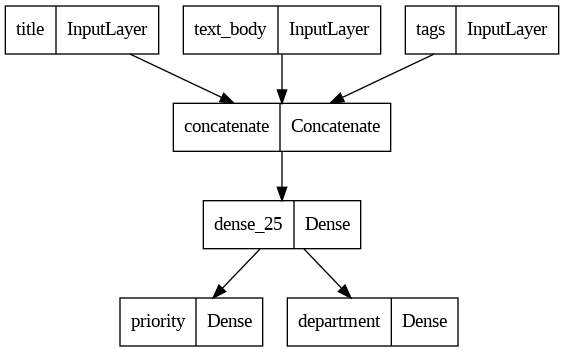

In [32]:
keras.utils.plot_model(model, "ticket_classifier.png")

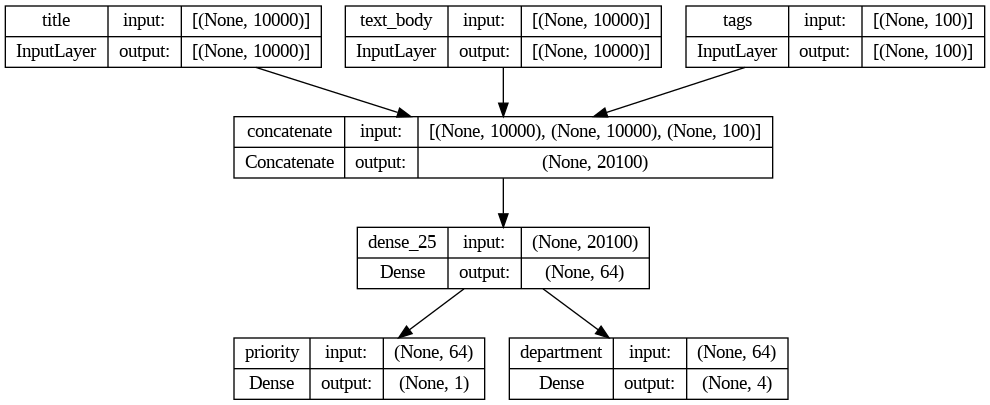

In [33]:
keras.utils.plot_model(model, "ticket_classifier_with_shape_info.png", show_shapes=True)

In [35]:
model.layers

In [36]:
model.layers[3].input

[<KerasTensor: shape=(None, 10000) dtype=float16 (created by layer 'title')>,
 <KerasTensor: shape=(None, 10000) dtype=float16 (created by layer 'text_body')>,
 <KerasTensor: shape=(None, 100) dtype=float16 (created by layer 'tags')>]

In [37]:
model.layers[3].output

<KerasTensor: shape=(None, 20100) dtype=float16 (created by layer 'concatenate')>

In [38]:
features = model.layers[4].output
difficulty = layers.Dense(3, activation="softmax", name="difficulty")(features)

new_model = keras.Model(
    inputs=[title, text_body, tags],
    outputs=[priority, department, difficulty])

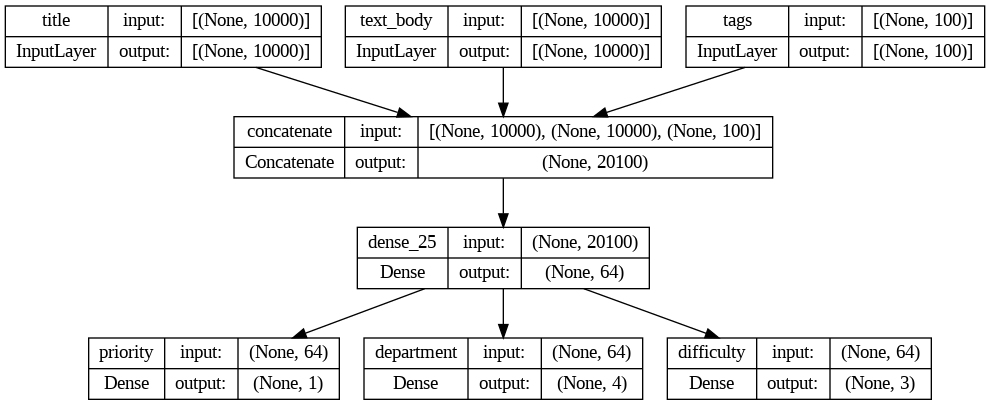

In [39]:
keras.utils.plot_model(new_model, "updated_ticket_classifier.png", show_shapes=True)

In [40]:
from tensorflow import keras
from tensorflow.keras import layers
inputs = keras.Input(shape=(28, 28, 1))
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(inputs)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(10, activation="softmax")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

In [41]:
model.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 128)         7385

In [42]:
from tensorflow.keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype("float32") / 255
model.compile(optimizer="rmsprop",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"])
model.fit(train_images, train_labels, epochs=5, batch_size=64)

Epoch 1/5
938/938 [==============================] - 7s 4ms/step - loss: 0.1595 - accuracy: 0.9692
Epoch 2/5
938/938 [==============================] - 3s 3ms/step - loss: 0.0454 - accuracy: 0.9985
Epoch 3/5
938/938 [==============================] - 4s 4ms/step - loss: 0.0315 - accuracy: 0.9990
Epoch 4/5
938/938 [==============================] - 3s 3ms/step - loss: 0.0234 - accuracy: 0.9990
Epoch 5/5
938/938 [==============================] - 3s 3ms/step - loss: 0.0179 - accuracy: 0.9995


In [43]:
test_loss,test_acc = model.evaluate(test_images,test_labels)
print(f"테스트 정확도:{test_acc:.3f}")

313/313 [==============================] - 2s 5ms/step - loss: 0.0234 - accuracy: 0.9966
테스트 정확도:0.997


In [63]:
import gdown
gdown.download(id='18uC7WTuEXKJDDxbj-Jq6EjzpFrgE7IAd', output='dogs-vs-cats.zip')

Downloading...
From (original): https://drive.google.com/uc?id=18uC7WTuEXKJDDxbj-Jq6EjzpFrgE7IAd
From (redirected): https://drive.google.com/uc?id=18uC7WTuEXKJDDxbj-Jq6EjzpFrgE7IAd&confirm=t&uuid=6a6d4347-c32c-4014-809e-a612b185a2cc
To: /content/dogs-vs-cats.zip
100%|██████████| 852M/852M [00:11<00:00, 74.7MB/s]


'dogs-vs-cats.zip'

In [64]:
!unzip -qq dogs-vs-cats.zip
!unzip -qq train.zip

replace sampleSubmission.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: replace train/cat.0.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [46]:
import os, shutil, pathlib

original_dir = pathlib.Path("train")
new_base_dir = pathlib.Path("cats_vs_dogs_small")

def make_subset(subset_name, start_index, end_index):
    for category in ("cat", "dog"):
        dir = new_base_dir / subset_name / category
        os.makedirs(dir)
        fnames = [f"{category}.{i}.jpg" for i in range(start_index, end_index)]
        for fname in fnames:
            shutil.copyfile(src=original_dir / fname,
                            dst=dir / fname)

make_subset("train", start_index=0, end_index=1000)
make_subset("validation", start_index=1000, end_index=1500)
make_subset("test", start_index=1500, end_index=2500)

In [47]:
from tensorflow import keras
from tensorflow.keras import layers

inputs = keras.Input(shape=(180,180,3))
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(filters=32,kernel_size=3,activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

In [48]:
model.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 89, 89, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 43, 43, 64)        0         
 g2D)                                                      

In [49]:
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

In [50]:
from tensorflow.keras.utils import image_dataset_from_directory

train_dataset = image_dataset_from_directory(
    new_base_dir / "train",
    image_size=(180, 180),
    batch_size=32)
validation_dataset = image_dataset_from_directory(
    new_base_dir / "validation",
    image_size=(180, 180),
    batch_size=32)
test_dataset = image_dataset_from_directory(
    new_base_dir / "test",
    image_size=(180, 180),
    batch_size=32)

Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
Found 2000 files belonging to 2 classes.


In [51]:
import numpy as np
import tensorflow as tf
random_numbers = np.random.normal(size=(1000, 16))
dataset = tf.data.Dataset.from_tensor_slices(random_numbers)

In [52]:
for i,element in enumerate(dataset):
    print(element.shape)
    if i >= 2:
        break

(16,)
(16,)
(16,)


In [53]:
batched_dataset = dataset.batch(32)
for i,element in enumerate(batched_dataset):
    print(element.shape)
    if i >=2:
        break

(32, 16)
(32, 16)
(32, 16)


In [54]:
reshaped_dataset = dataset.map(lambda x: tf.reshape(x, (4, 4)))
for i, element in enumerate(reshaped_dataset):
    print(element.shape)
    if i >= 2:
        break

(4, 4)
(4, 4)
(4, 4)


In [55]:
for data_batch,labels_batch in train_dataset:
    print("데이터 배치 크기:",data_batch.shape)
    print("레이블 배치 크기:",labels_batch.shape)
    break

데이터 배치 크기: (32, 180, 180, 3)
레이블 배치 크기: (32,)


In [56]:
callbacks=[
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch.h5",
        save_best_only=True,
        monitor="val_loss")]
history = model.fit(
    train_dataset,
    epochs=30,
    validation_data = validation_dataset,
    callbacks = callbacks)

Epoch 1/30
63/63 [==============================] - 19s 147ms/step - loss: 0.6948 - accuracy: 0.5342 - val_loss: 0.7344 - val_accuracy: 0.5000
Epoch 2/30


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


63/63 [==============================] - 5s 68ms/step - loss: 0.6953 - accuracy: 0.5337 - val_loss: 0.6797 - val_accuracy: 0.5640
Epoch 3/30
63/63 [==============================] - 7s 107ms/step - loss: 0.6797 - accuracy: 0.5913 - val_loss: 0.7324 - val_accuracy: 0.5508
Epoch 4/30
63/63 [==============================] - 5s 68ms/step - loss: 0.6636 - accuracy: 0.6304 - val_loss: 0.6382 - val_accuracy: 0.6250
Epoch 5/30
63/63 [==============================] - 7s 100ms/step - loss: 0.6279 - accuracy: 0.6436 - val_loss: 0.6152 - val_accuracy: 0.6509
Epoch 6/30
63/63 [==============================] - 5s 72ms/step - loss: 0.5820 - accuracy: 0.6929 - val_loss: 0.5786 - val_accuracy: 0.6641
Epoch 7/30
63/63 [==============================] - 3s 52ms/step - loss: 0.5659 - accuracy: 0.7148 - val_loss: 0.5815 - val_accuracy: 0.6821
Epoch 8/30
63/63 [==============================] - 5s 79ms/step - loss: 0.5391 - accuracy: 0.7275 - val_loss: 0.5654 - val_accuracy: 0.6992
Epoch 9/30
63/63 [====

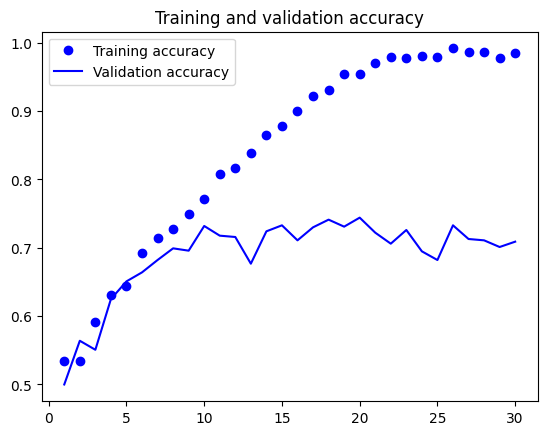

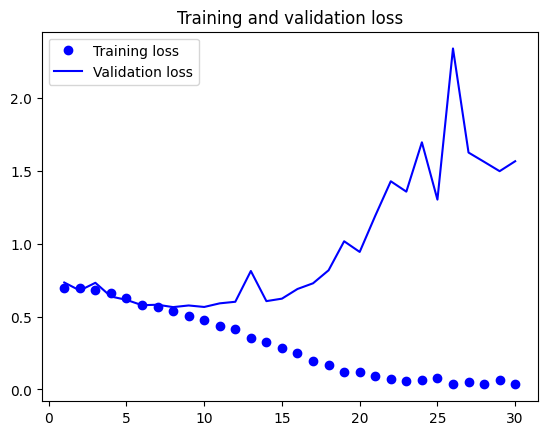

In [57]:
import matplotlib.pyplot as plt
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [58]:
test_model = keras.models.load_model("convnet_from_scratch.h5")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"테스트 정확도: {test_acc:.3f}")

63/63 [==============================] - 5s 63ms/step - loss: 0.5649 - accuracy: 0.7104
테스트 정확도: 0.710


In [61]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

In [62]:
plt.figure(figsize=(10, 10))
for images, _ in train_dataset.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

InvalidArgumentError: Exception encountered when calling layer 'random_rotation' (type RandomRotation).

cannot compute Mul as input #1(zero-based) was expected to be a half tensor but is a float tensor [Op:Mul] name: 

Call arguments received by layer 'random_rotation' (type RandomRotation):
  • inputs=tf.Tensor(shape=(32, 180, 180, 3), dtype=float16)
  • training=True

<Figure size 1000x1000 with 0 Axes>

In [65]:
!wget http://www.robots.ox.ac.uk/~vgg/data/pets/data/images.tar.gz
!wget http://www.robots.ox.ac.uk/~vgg/data/pets/data/annotations.tar.gz
!tar -xf images.tar.gz
!tar -xf annotations.tar.gz

--2024-04-25 08:37:35--  http://www.robots.ox.ac.uk/~vgg/data/pets/data/images.tar.gz
Resolving www.robots.ox.ac.uk (www.robots.ox.ac.uk)... 129.67.94.2
Connecting to www.robots.ox.ac.uk (www.robots.ox.ac.uk)|129.67.94.2|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://www.robots.ox.ac.uk/~vgg/data/pets/data/images.tar.gz [following]
--2024-04-25 08:37:35--  https://www.robots.ox.ac.uk/~vgg/data/pets/data/images.tar.gz
Connecting to www.robots.ox.ac.uk (www.robots.ox.ac.uk)|129.67.94.2|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://thor.robots.ox.ac.uk/~vgg/data/pets/images.tar.gz [following]
--2024-04-25 08:37:36--  https://thor.robots.ox.ac.uk/~vgg/data/pets/images.tar.gz
Resolving thor.robots.ox.ac.uk (thor.robots.ox.ac.uk)... 129.67.95.98
Connecting to thor.robots.ox.ac.uk (thor.robots.ox.ac.uk)|129.67.95.98|:443... connected.
HTTP request sent, awaiting response... 301 Moved Perman

In [66]:
import os

input_dir = "images/"
target_dir = "annotations/trimaps/"

input_img_paths = sorted(
    [os.path.join(input_dir, fname)
     for fname in os.listdir(input_dir)
     if fname.endswith(".jpg")])
target_paths = sorted(
    [os.path.join(target_dir, fname)
     for fname in os.listdir(target_dir)
     if fname.endswith(".png") and not fname.startswith(".")])

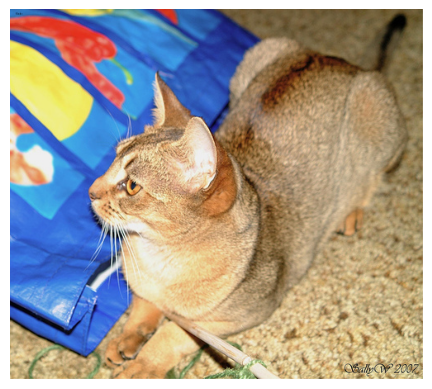

In [67]:
import matplotlib.pyplot as plt
from tensorflow.keras.utils import load_img, img_to_array

plt.axis("off")
plt.imshow(load_img(input_img_paths[9]))

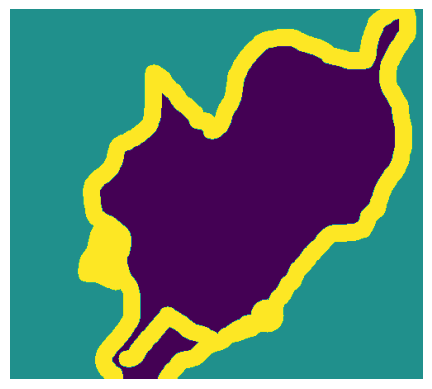

In [69]:
def display_target(target_array):
    normalized_array = (target_array.astype("uint8")-1)*127
    plt.axis("off")
    plt.imshow(normalized_array[:,:,0])
img = img_to_array(load_img(target_paths[9],color_mode="grayscale"))
display_target(img)

In [70]:
import numpy as np
import random

img_size=(200,200)
num_imgs = len(input_img_paths)

random.Random(1337).shuffle(input_img_paths)
random.Random(1337).shuffle(target_paths)

def path_to_input_image(path):
    return img_to_array(load_img(path,target_size=img_size))
def path_to_target(path):
    img = img_to_array(
        load_img(path, target_size=img_size, color_mode="grayscale"))
    img = img.astype("uint8") - 1
    return img

input_imgs = np.zeros((num_imgs,) + img_size + (3,), dtype="float32")
targets = np.zeros((num_imgs,) + img_size + (1,), dtype="uint8")
for i in range(num_imgs):
    input_imgs[i] = path_to_input_image(input_img_paths[i])
    targets[i] = path_to_target(target_paths[i])

num_val_samples = 1000
train_input_imgs = input_imgs[:-num_val_samples]
train_targets = targets[:-num_val_samples]
val_input_imgs = input_imgs[-num_val_samples:]
val_targets = targets[-num_val_samples:]
